In [177]:
#start with new dataset
# commit messages , class : random forest, nueral network (compare results)
#metrics class : random forest, nueral network (compare results)
#imported all required libraries 
import pandas as pd
import numpy as np
from keras.preprocessing.text import one_hot  #import library for hot-encoding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential #import needed functions for LSTM
from keras.layers.core import Activation, Dropout, Dense #import functions needed for LSTM
from keras.layers import Flatten, LSTM  #import LSTM framework 
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding  #import libraries required for word-embeddings 
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
import matplotlib.pyplot as plt
from numpy import array
import re #to handle regex 
import matplotlib.pyplot as plt # for plotting charts
import seaborn as sns # to plot charts
from sklearn.preprocessing import StandardScaler # to test sklearn
import keras # Imports keras framework 
from sklearn import preprocessing
from keras.utils import to_categorical
import tensorflow as tf # Import tensorflow framework
from keras import backend as K
from nltk.corpus import stopwords
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, add, concatenate
#from keras.layers import CuDNNLSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
#from gensim.models import KeyedVectors
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [178]:
#Read the dataset into dataframe 
df_c = pd.read_csv('C:/Users/Priya/Desktop/IndependentStudy/Dataset1.csv')

In [179]:
#print dataframe
df_c

,Commit message,Class,AvgCyclomatic,AvgCyclomaticModified,AvgCyclomaticStrict,AvgEssential,AvgLine,AvgLineBlank,AvgLineCode,AvgLineComment,...,MaxInheritanceTree,MaxNesting,MinEssentialKnots,PercentLackOfCohesion,PercentLackOfCohesionModified,RatioCommentToCode,SumCyclomatic,SumCyclomaticModified,SumCyclomaticStrict,SumEssential
0,extract method.,extract,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.012821,0.012821,0.0,0.018182,0.018182,0.017544,0.025641
1,Minor tweaks following review extraction of me...,extract,0.5,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.054545,0.054545,0.052632,0.076923
2,extract some stuff to a method[git p4: depot p...,extract,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,extract some methods in DoiServiceImpl,extract,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,refactoring getMenuSpace in Navigation: extrac...,extract,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999,Rename getProtocol to getMechanism in TestClient,rename,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5000,Rename mapping methods to mapFrom/mapTo Signe...,rename,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5001,renaming refactor on deserialization related c...,rename,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5002,renamed usage to description to match the name...,rename,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
#data cleaning 
#drop nans
df_c=df_c.dropna()
#df_c.fillna(df_c.mean(), inplace=True)
#df_c= df_c.sample(frac=1)

In [181]:
#randomie the dataset 
df_c= df_c.sample(frac=1)

In [182]:
#display unique refactoring classes 
df_c.Class.unique()

array(['extract', 'pull up', 'move', 'inline'], dtype=object)

In [183]:
#display the count of each class
df_c['Class'].value_counts()

pull up    811
inline     636
extract    494
move       415
Name: Class, dtype: int64

In [184]:
#X and Y as commit messages and classes
X = df_c.drop('Class', axis=1)

y = df_c['Class']

In [185]:
# enocoded labels 
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [186]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [187]:
#function to preprocess commit messages text data
'''
Remove punctuations and numbers from commits 
Removing multiple spaces from each commit
Remove Single characters from commits 
'''
def preprocess_commits(sen): 
    text = re.sub('[^a-zA-Z]', ' ', sen)
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [188]:
#prepare training dataset
X1_train = []
sentences = list(X_train["Commit message"])
for sen in sentences:
    X1_train.append(preprocess_commits(sen))

In [189]:
#prepare test dataset
X1_test = []
sentences = list(X_test["Commit message"])
for sen in sentences:
    X1_test.append(preprocess_commits(sen))

In [190]:
#convert commit messages text data to numeric data for classification
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X1_train)

X1_train = tokenizer.texts_to_sequences(X1_train)
X1_test = tokenizer.texts_to_sequences(X1_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X1_train = pad_sequences(X1_train, padding='post', maxlen=maxlen)
X1_test = pad_sequences(X1_test, padding='post', maxlen=maxlen)

In [191]:
#create word embedding matrix
#download glove data set from http://nlp.stanford.edu/data/glove.6B.zip site and copied required file to c/users/priya where all notebooks are
embeddings_dict = dict()

glove_f = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_f:
    n_records = line.split()
    word = n_records[0]
    vector = asarray(n_records[1:], dtype='float32')
    embeddings_dict[word] = vector

glove_f.close()

embedding_mat = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_mat[index] = embedding_vector

In [192]:
#functions to calculate keras custom metrics
'''
function to calculate recall metrics of the model
Recall = TruePositives / (TruePositives + FalseNegatives)
Y_t: true values
Y_p: predicted true values 

'''
def recall(Y_t, Y_p):
    Y_t = K.ones_like(Y_t) 
    true_positives = K.sum(K.round(K.clip(Y_t * Y_p, 0, 1)))
    all_positives = K.sum(K.round(K.clip(Y_t, 0, 1)))
    recall = true_positives / (all_positives + K.epsilon())
    return recall

'''
function to calculate precision of the model
Precision= TruePositives / (TruePositives + FalsePositives)
Y_t: true values
Y_p: predicted true values 
'''
def precision(Y_t, Y_p):
    Y_t = K.ones_like(Y_t) 
    true_positives = K.sum(K.round(K.clip(Y_t * Y_p, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(Y_p, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

'''
function to calculate F-1 score of the model
F-1 score=  (2 * Precision * Recall) / (Precision + Recall)
Y_t: true values
Y_p: predicted true values 
'''
def f1_score(Y_t, Y_p):
    pr = precision(Y_t, Y_p)
    rc = recall(Y_t, Y_p)
    return 2*((pr*rc)/(pr+rc+K.epsilon()))

In [193]:
#create input layers: input1 , input2 
input_l1 = Input(shape=(maxlen,))
input_l2 = Input(shape=(60,))

In [194]:
#create embedding layer
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_mat], trainable=False)(input_l1)
lstm_l1 = LSTM(128)(embedding_layer)

In [195]:
#create dense layers
dense_layer1 = Dense(10, activation='softmax')(input_l2)
dense_layer2 = Dense(10, activation='softmax')(dense_layer1)

In [196]:
#concate these layers 
concat_layer = Concatenate()([lstm_l1, dense_layer2])
dense_layer3 = Dense(10, activation='softmax')(concat_layer) #to create third layer 
output = Dense(4, activation='softmax')(dense_layer3)
model = Model(inputs=[input_l1, input_l2], outputs=output)

In [197]:
#compile LSTM model
# loss function, optimizer, metrics values 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc',f1_score, precision, recall]) # pass metrics values to get the results for it 

In [198]:
#print X1_train (converted commit text)
X1_train

array([[ 860, 2590,   29, ...,    0,    0,    0],
       [  53,    3,  861, ...,    0,    0,    0],
       [  31, 2597,   45, ...,    0,    0,    0],
       ...,
       [  29,    3,  105, ...,    0,    0,    0],
       [1450,  496, 3796, ...,    0,    0,    0],
       [  41,  223,   26, ...,    0,    0,    0]])

In [199]:
#define X2_train and X2_test as code metrics 
X2_train = X_train[['AvgCyclomatic', 'AvgCyclomaticModified', 'AvgCyclomaticStrict','AvgEssential','AvgLine','AvgLineBlank','AvgLineCode','AvgLineComment','CountClassBase','CountClassCoupled','CountClassCoupledModified','CountClassDerived','CountDeclClass','CountDeclClassMethod','CountDeclClassVariable','CountDeclExecutableUnit','CountDeclFile','CountDeclFunction','CountDeclInstanceMethod','CountDeclInstanceVariable','CountDeclMethod','CountDeclMethodAll','CountDeclMethodDefault','CountDeclMethodPrivate','CountDeclMethodProtected','CountDeclMethodPublic','CountInput','CountLine','CountLineBlank','CountLineCode','CountLineCodeDecl','CountLineCodeExe','CountLineComment','CountOutput','CountPath','CountPathLog','CountSemicolon','CountStmt','CountStmtDecl','CountStmtExe','Cyclomatic','CyclomaticModified','CyclomaticStrict','Essential','Knots','MaxCyclomatic','MaxCyclomaticModified','MaxCyclomaticStrict','MaxEssential','MaxEssentialKnots','MaxInheritanceTree','MaxNesting','MinEssentialKnots','PercentLackOfCohesion','PercentLackOfCohesionModified','RatioCommentToCode','SumCyclomatic','SumCyclomaticModified','SumCyclomaticStrict','SumEssential']].values
X2_test = X_test[[ 'AvgCyclomatic', 'AvgCyclomaticModified', 'AvgCyclomaticStrict','AvgEssential','AvgLine','AvgLineBlank','AvgLineCode','AvgLineComment','CountClassBase','CountClassCoupled','CountClassCoupledModified','CountClassDerived','CountDeclClass','CountDeclClassMethod','CountDeclClassVariable','CountDeclExecutableUnit','CountDeclFile','CountDeclFunction','CountDeclInstanceMethod','CountDeclInstanceVariable','CountDeclMethod','CountDeclMethodAll','CountDeclMethodDefault','CountDeclMethodPrivate','CountDeclMethodProtected','CountDeclMethodPublic','CountInput','CountLine','CountLineBlank','CountLineCode','CountLineCodeDecl','CountLineCodeExe','CountLineComment','CountOutput','CountPath','CountPathLog','CountSemicolon','CountStmt','CountStmtDecl','CountStmtExe','Cyclomatic','CyclomaticModified','CyclomaticStrict','Essential','Knots','MaxCyclomatic','MaxCyclomaticModified','MaxCyclomaticStrict','MaxEssential','MaxEssentialKnots','MaxInheritanceTree','MaxNesting','MinEssentialKnots','PercentLackOfCohesion','PercentLackOfCohesionModified','RatioCommentToCode','SumCyclomatic','SumCyclomaticModified','SumCyclomaticStrict','SumEssential']].values

#X2_train = X_train[['AvgLineBlank', 'SumCyclomatic', 'SumCyclomaticModified','SumCyclomaticStrict','SumEssential']].values
#X2_test = X_test[[ 'AvgLineBlank', 'SumCyclomatic', 'SumCyclomaticModified','SumCyclomaticStrict','SumEssential']].values

In [200]:
#train LSTM model with epoch = 10 and batch_size of 128 
#model will print all the metrics values as well since we defined while compiling this model  
'''
hyper parameters:
batch_size= 128 (should be divisble by 8)
verbose= 1 (showing the bar in results)
epoch= 10
'''
lstm_m = model.fit(x=[X1_train, X2_train], y=y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 7s 572ms/step - loss: 1.3862 - acc: 0.3033 - f1_score: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3767 - val_acc: 0.3660 - val_f1_score: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
12/12 [==============================] - 6s 507ms/step - loss: 1.3645 - acc: 0.3404 - f1_score: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3360 - val_acc: 0.3660 - val_f1_score: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 6s 514ms/step - loss: 1.3577 - acc: 0.3404 - f1_score: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3366 - val_acc: 0.3660 - val_f1_score: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
12/12 [==============================] - 6s 510ms/step - loss: 1.3570 - acc: 0.3404 - f1_score: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+

In [201]:
#Evaluate our model and print accuracy 
sc = model.evaluate(x=[X1_test, X2_test], y=y_test, verbose=1)

print("Test Score:", sc[0])
print("Test Accuracy:", sc[1])
print("F-1 score", sc[2])
print("Precision", sc[3])
print("Recall", sc[4])

15/15 [==============================] - 1s 88ms/step - loss: 1.3585 - acc: 0.3390 - f1_score: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00
Test Score: 1.3584660291671753
Test Accuracy: 0.33898305892944336
F-1 score 0.0
Precision 0.0
Recall 0.0


In [202]:
#print all metrics 
score

[1.3489497900009155,
 0.33474576473236084,
 0.006185648497194052,
 0.3333333134651184,
 0.0031250000465661287]

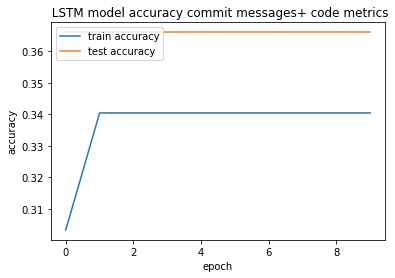

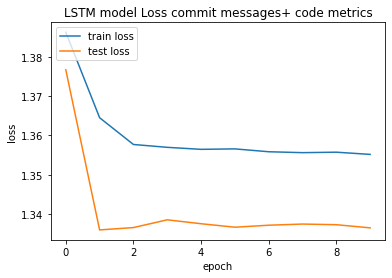

In [203]:
#plot accuracy and loss graphs for the model 
plt.plot(lstm_m.history['acc'])
plt.plot(lstm_m.history['val_acc'])
plt.title(' LSTM model accuracy commit messages+ code metrics')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy','test accuracy'], loc='upper left')
plt.show()

plt.plot(lstm_m.history['loss'])
plt.plot(lstm_m.history['val_loss'])

plt.title('LSTM model Loss commit messages+ code metrics')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','test loss'], loc='upper left')
plt.show()